In [1]:
# Classification algorithms: Naive bayes, SVM, Decision Trees & Random Forests, 

In [2]:
# Regression algorithms: Linear/Logistic regression, SVM, Decision Trees & Random Forests, 

In [3]:
# Clustering algorithms: K-Means

In [4]:
# Dimensionality reduction: PCA

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [97]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [98]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [99]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [100]:
iris.shape

(150, 5)

In [101]:
print(iris.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [102]:
# fillna

In [103]:
iris['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [104]:
print(iris['species'].value_counts().count())

3


In [107]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()

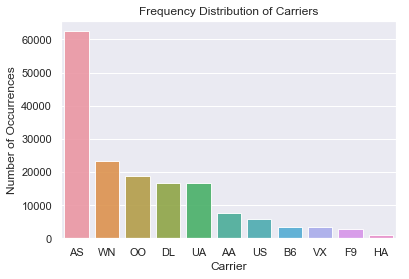

In [108]:
carrier_count = cat_df_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

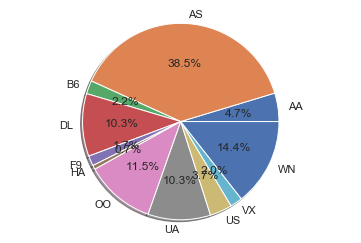

In [109]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
counts = cat_df_flights['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [111]:
cat_df_flights.head()

carrier tailnum origin dest
0      AS  N508AS    PDX  ANC
1      US  N195UW    SEA  CLT
2      UA  N37422    PDX  IAH
3      US  N547UW    PDX  CLT
4      AS  N762AS    SEA  ANC

In [113]:
cat_df_flights.groupby(['origin','carrier'])['dest'].count()

origin  carrier
PDX     AA          2187
        AS         12844
        B6          1287
        DL          5168
        F9          1362
        HA           365
        OO          9841
        UA          6061
        US          2361
        VX           666
        WN         11193
SEA     AA          5399
        AS         49616
        B6          2253
        DL         11548
        F9          1336
        HA           730
        OO          8869
        UA         10610
        US          3585
        VX          2606
        WN         12162
Name: dest, dtype: int64

In [116]:
cat_df_flights['carrier_codes'] = cat_df_flights['carrier'].astype('category').cat.codes

In [117]:
cat_df_flights.head()

carrier tailnum origin dest  carrier_codes
0      AS  N508AS    PDX  ANC              1
1      US  N195UW    SEA  CLT              8
2      UA  N37422    PDX  IAH              7
3      US  N547UW    PDX  CLT              8
4      AS  N762AS    SEA  ANC              1

In [118]:
# Encode all the US carrier flights to value 1 and other carriers to value 0
cat_df_flights['US_code'] = np.where(cat_df_flights['carrier'].str.contains('US'), 1, 0)
cat_df_flights.head()

carrier tailnum origin dest  carrier_codes  US_code
0      AS  N508AS    PDX  ANC              1        0
1      US  N195UW    SEA  CLT              8        1
2      UA  N37422    PDX  IAH              7        0
3      US  N547UW    PDX  CLT              8        1
4      AS  N762AS    SEA  ANC              1        0

In [119]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_flights['carrier_code_le'] = lb_make.fit_transform(cat_df_flights['carrier'])

In [120]:
cat_df_flights.head()

carrier tailnum origin dest  carrier_codes  US_code  carrier_code_le
0      AS  N508AS    PDX  ANC              1        0                1
1      US  N195UW    SEA  CLT              8        1                8
2      UA  N37422    PDX  IAH              7        0                7
3      US  N547UW    PDX  CLT              8        1                8
4      AS  N762AS    SEA  ANC              1        0                1

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


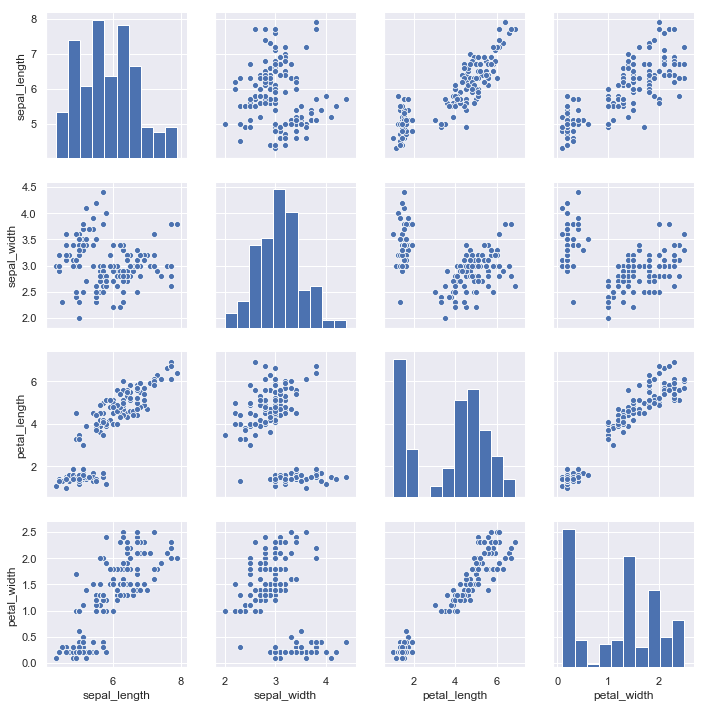

In [121]:
#scatterplot
sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(iris, size = 2.5)
plt.show();

In [123]:
iris.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

In [124]:
# Percentage of missing data
total = cat_df_flights.isnull().sum().sort_values(ascending=False)
percent = (cat_df_flights.isnull().sum()/cat_df_flights.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
tailnum            248  0.00153
carrier_code_le      0  0.00000
US_code              0  0.00000
carrier_codes        0  0.00000
dest                 0  0.00000
origin               0  0.00000
carrier              0  0.00000

In [3]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

In [153]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [154]:
y_iris = iris['species']
y_iris.shape

(150,)

In [155]:
# Standardise columns 
from sklearn import preprocessing

names = X_iris.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(X_iris)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [156]:
scaled_df.head()

sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444
2     -1.385353     0.328414     -1.397064    -1.315444
3     -1.506521     0.098217     -1.283389    -1.315444
4     -1.021849     1.249201     -1.340227    -1.315444

In [172]:
import pandas_profiling as pp
pp.ProfileReport(iris)

In [158]:
profile = iris.profile_report()
rejected_variables = profile.get_rejected_variables(threshold=0.9)
rejected_variables

['petal_width']

### Steps

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

### Supervised learning example: Simple linear regression

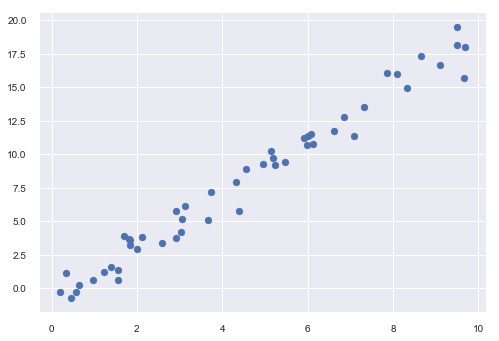

In [159]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

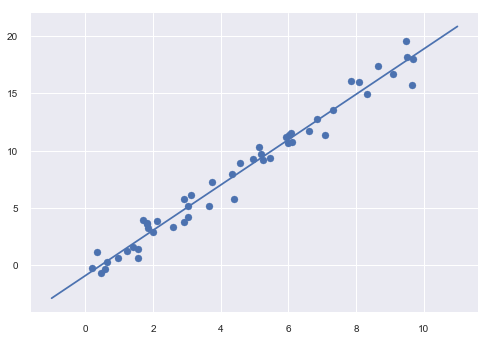

In [160]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]
model.fit(X, y)
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)

### Supervised learning example: iris classification

In [161]:
# Example sklearn
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [162]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [163]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [164]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
mat

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

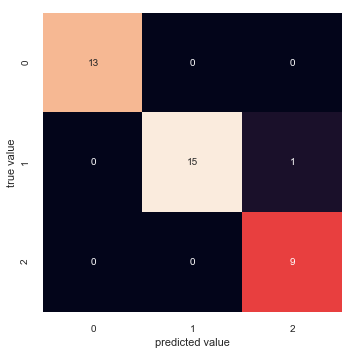

In [165]:
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

### Unsupervised learning example: iris dimensionality

In [166]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

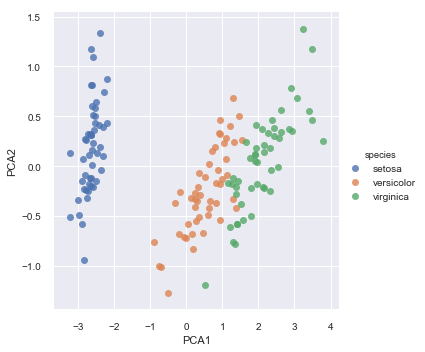

In [167]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### Unsupervised learning example: iris clustering

In [168]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

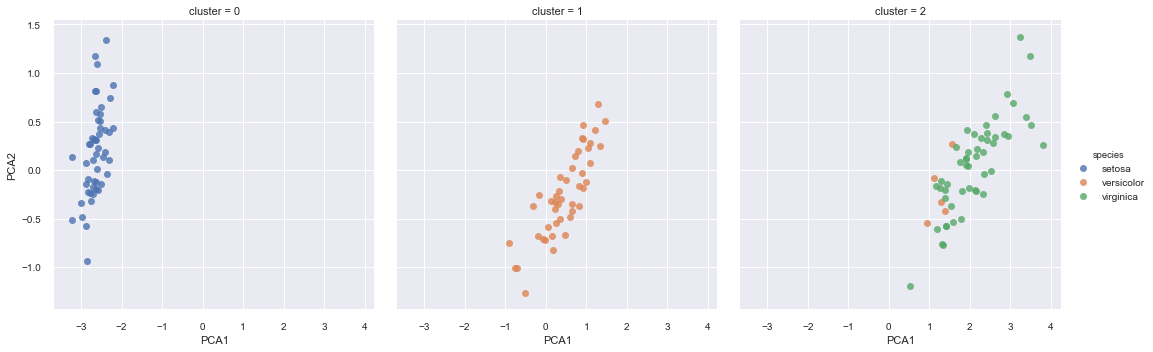

In [169]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

In [170]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

FileNotFoundError: [Errno 2] No such file or directory: '/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv'

In [85]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [86]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)

In [87]:
scores.mean()

0.96

### The Bias-variance trade-off

The $R^2$ score, or [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination),  measures how well a model performs relative to a simple mean of the target values. $R^2=1$ indicates a perfect match, $R^2=0$ indicates the model does no better than simply taking the mean of the data, and negative values mean even worse models.

In [91]:
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid={
            'n_neighbors': [1, 2, 3],
            'weights': ['uniform', 'distance']
        },
        cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [92]:
grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_
best_svr = KNeighborsClassifier(n_neighbors =best_params["n_neighbors"], 
                                weights=best_params["weights"])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished


In [93]:
best_params

{'n_neighbors': 3, 'weights': 'uniform'}

In [94]:
# NOTE: not all scorings are valid in all cases. e.g. roc_auc_score wasn't valid because we don't have a binary class 
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter